#### SHAP 모듈로부터 보스턴 데이터셋을 불러와서 보스턴 주택 가격 결정 요소 구하기 

In [3]:
#SHAP 모듈로부터 보스턴 데이터셋을 불러와서 학습용과 테스트용 데이터셋으로 분리하는 코드 
import shap 
from sklearn.model_selection import train_test_split

X, y = shap.datasets.boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

X_train[:10]

/home/sojihae99/miniconda3/envs/xai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/sojihae99/miniconda3/envs/xai/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
185,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15
101,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67
268,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04


Text(0, 0.5, 'MEDV |n Price $1,000')

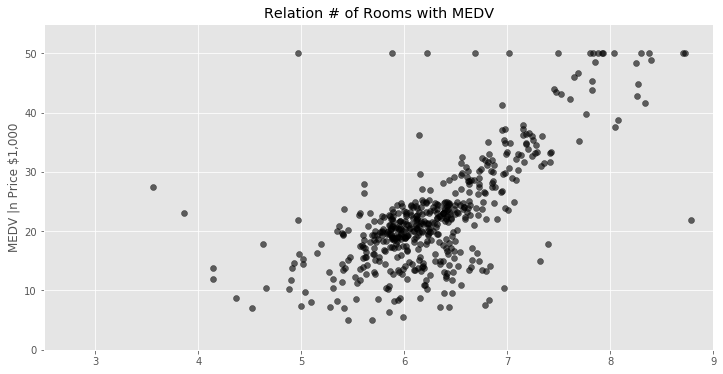

In [4]:
#방의 개수와 집값 간의 관계를 산점도로 그리는 코드 
#산점도 출력 코드 

import matplotlib.pylab as plt 
import matplotlib
%matplotlib inline 
matplotlib.style.use('ggplot')

fig, ax1 = plt.subplots(1,1, figsize = (12, 6))

ax1.scatter(X['RM'], y, color = 'black', alpha = 0.6)

ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_label('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV |n Price $1,000')
#산점도 표시 결과, 방 개수가 즈가할 때 주택 매매 가격이 상승하는 경향을 보임 
#그러나, 13개의 복잡한 피쳐가 맞물려 집값을 결정할 때 이것을 합리적으로 설명할 수 있는 초평면을 찾아야함 

In [6]:
#선형 모델을 이용해서 방 개수와 주택 가격 간의 관계를 구하는 코드 
from sklearn import linear_model 
import pandas as pd 

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X_train['RM']), y = y_train)
prediction = linear_regression.predict(X = pd.DataFrame(X_test['RM']))

print('a value: ', linear_regression.intercept_)
print('b value: ', linear_regression.coef_)
print('MEDV = {:.2f} * RM = {:.2f}'.format(linear_regression.coef_[0],
                                           linear_regression.intercept_))

a value:  -32.39552264560753
b value:  [8.76050748]
MEDV = 8.76 * RM = -32.40


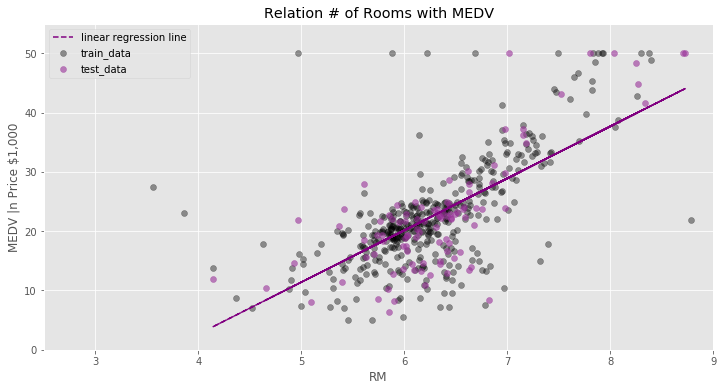

In [8]:
#방의 개수가 달라질 때 주택 매매 가격을 예측하는 그래프와 데이터를 한꺼번에 플롯으로 그리는 코드 
#학습, 테스트 데이터를 산점도로 그리고 직선의 방정식을 표시하는 코드 

fig, ax1 = plt.subplots(1,1, figsize = (12, 6))

ax1.scatter(X_train['RM'], y_train, color = 'black',
            alpha = 0.4, label = 'train_data')

ax1.scatter(X_test['RM'], y_test, color = '#993299',
            alpha = 0.6, label = 'test_data')

ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV |n Price $1,000')

ax1.plot(X_test['RM'], prediction, color = 'purple', alpha = 1,
         linestyle = '--', label = 'linear regression line')

ax1.legend()

In [9]:
#모델 예측치와 실제값 간의 RMSE를 구하는 코드 
import numpy as np 
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, prediction, squared=False))

print("RMSE : %f" % (rmse))

RMSE : 2.526487


In [10]:
#xgboost의 선형 회귀 모델로 주택 매매 가격을 예측하는 모델을 만들고 학습하는 코드 
import xgboost 

#XGboost의 모델 학습하기 
model = xgboost.XGBRegressor(objective = 'reg:linear')
model.fit(X_train, y_train)

preds = model.predict(X_test)

[14:48:25] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE : %f" % (rmse))

RMSE : 3.006564


#### xai 적용하기 

In [12]:
#shap 설명체를 정의하고 섀플리 값을 계산하는 로직 
#JS 시각화 라이브러리 로드하기 
shap.initjs()

#SHAP 값으로 모델의 예측 설명하기 
#SHAP.TreeExplainer는 섀플리 값의 출력 형태를 앙상블 트리 형태로 시각화 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [14]:
#첫번째 데이터에 대한 구체적인 SHAP 값 시각화 
shap.force_plot(explainer.expected_value,
                shap_values[0,:],
                X_train.iloc[0,:])

In [15]:
#전체 데이터에 대한 섀플리 값을 플롯으로 그리는 코드 
#모델이 학습 데이터를 예측한 결과에 대해 SHAP으로 분석한 결과 출력 
shap.force_plot(explainer.expected_value, shap_values, X_train)

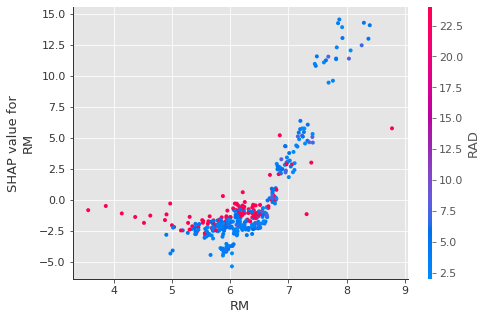

In [16]:
#하나의 피쳐가 전체 예측에 미치는 영향력을 SHAP으로 계산하고 출력하는 코드 
shap.dependence_plot("RM", shap_values, X_train)

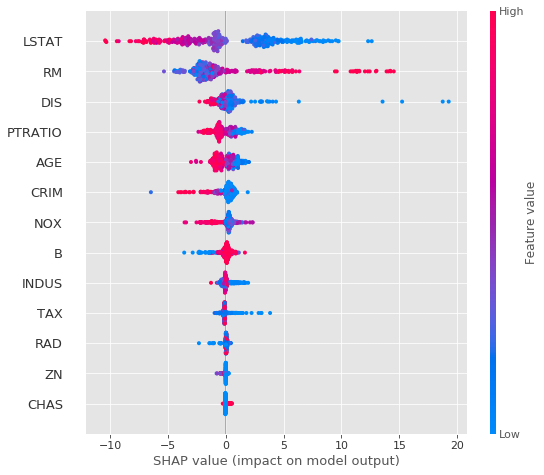

In [17]:
#모든 피처에 대해 shap 값을 계산하고, 영향력을 시각화하는 코드 
shap.summary_plot(shap_values, X_train)

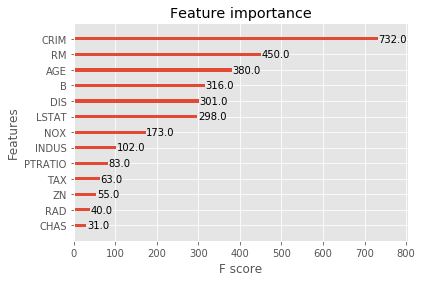

In [18]:
#xgboost의 피쳐 중요도를 호출하는 코드 
xgboost.plot_importance(model)